In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

import scipy
import numpy as np
from scipy import interpolate
from io import StringIO

from scipy.interpolate import UnivariateSpline

# Reading data

CSV format

In [2]:
#from bigfloat import *

def isNaN(string):
    return string != string
print(isNaN("hello"))
print(isNaN(np.nan))

False
True


Input data type

In [3]:
zeroformat=True

In [4]:
dir = "/home/rita13santos/Desktop/aqui/run4"#1

1D output format

In [85]:
vars=["m", "beta", "xi", "derxi", "derderxi"]
time=[]
grid=[]

k=1
m_ori=[]
m_scri=[]
beta_ori=[]
beta_scri=[]
xi_ori=[]
xi_scri=[]
derxi_ori=[]
derxi_scri=[]
derderxi_ori=[]
derderxi_scri=[]



k=1

for var in vars:
    dir = "/home/rita13santos/Desktop/now/run21/{}.txt".format(var)
        
        
        
    
    print(dir)

    with open(dir) as f:
        for line in f:
            index = line.find("Time")
            if index==1:
                if k==1:
                    time.append(float(line[index+7:len(line)-1]))
                auxgrid=[]
                auxdata=[]
                

            else:
                a=line.split()
                if a!=[]:
                    if k==1:
                        auxgrid.append(float(a[0]))
                    auxdata.append(float(a[1]))
                elif a==[]:
                    grid.append(auxgrid)
                    if k==1:
                        m_ori.append(auxdata[3])
                        m_scri.append(auxdata[len(auxdata)-4])
                    elif k==2:
                        beta_ori.append(auxdata[3])
                        beta_scri.append(auxdata[len(auxdata)-4])
                    elif k==3:
                        xi_ori.append(auxdata[3])
                        xi_scri.append(auxdata[len(auxdata)-4])
                    elif k==4:
                        derxi_ori.append(auxdata[3])
                        derxi_scri.append(auxdata[len(auxdata)-4])
                    elif k==5:
                        derderxi_ori.append(auxdata[3])
                        derderxi_scri.append(auxdata[len(auxdata)-4])
                        
                    
    k=k+1



/home/rita13santos/Desktop/now/run21/m.txt
/home/rita13santos/Desktop/now/run21/beta.txt
/home/rita13santos/Desktop/now/run21/xi.txt
/home/rita13santos/Desktop/now/run21/derxi.txt
/home/rita13santos/Desktop/now/run21/derderxi.txt


0D output format

In [5]:
res=1
vars=["m", "beta", "xi", "derxi", "derderxi"]
time=[]
grid=[]
"""m=[]
beta=[]
xi=[]
derxi=[]"""
k=1
m_ori=[]
m_scri=[]
beta_ori=[]
beta_scri=[]
xi_ori=[]
xi_scri=[]
derxi_ori=[]
derxi_scri=[]
derderxi_ori=[]

maxmonitorratio=[]

for var in vars:
    
    
    subdir = dir+"/{}.txt".format(var)

    
    print(subdir)
    
    if zeroformat==False: ## reading 2D data
        t=0
        with open(subdir) as f:
            for line in f:

                index = line.find("Time")

                if index==1:
                    t=t+1
                    if k==1:
                        time.append(float(line[index+7:len(line)-1]))
                    auxgrid=[]
                    auxdata=[]


                else:

                    a=line.split()
                    if a!=[]:
                        if k==1:
                            auxgrid.append(float(a[0]))
                        auxdata.append(float(a[1]))

                    elif a==[]:


                        if k==1:
                            if t==1:
                                grid.append(auxgrid)
                            L=len(auxgrid)
                            m_ori.append(auxdata[3])
                            m_scri.append(auxdata[L-4])



                            monitor_ratio=[]
                            i=4
                            for m in auxdata[4:L-4]:
                                monitor_ratio.append(2*m/grid[0][i]*(1-grid[0][i]))
                                i=i+1
                            maxmonitorratio.append(np.max(monitor_ratio))




                        elif k==2:
                            beta_ori.append(auxdata[3])
                            beta_scri.append(auxdata[L-4])
                        elif k==3:
                            xi_ori.append(auxdata[3])
                            xi_scri.append(auxdata[L-4])
                        elif k==4:
                            derxi_ori.append(auxdata[3])
                            derxi_scri.append(auxdata[L-4])
                        elif k==5:
                            derderxi_ori.append(np.max(auxdata[3]))
    else: ## reading 0D data
        with open(subdir) as f:
            i=0
            for line in f:
                i=i+1
                a=line.split()
                #print("i = ", i, " a = ", a)
            
            
            
                #a=line.split()
            
                if k==1:
                    time.append(float(a[0]))
                    m_ori.append(float(a[1]))
                    m_scri.append(float(a[2]))
                elif k==2:
                    beta_ori.append(float(a[1]))
                    beta_scri.append(float(a[2]))
                elif k==3:
                    xi_ori.append(float(a[1]))
                    xi_scri.append(float(a[2]))
                elif k==4:
                    derxi_ori.append(float(a[1]))
                    derxi_scri.append(float(a[2]))
                elif k==5:
                    derderxi_ori.append(float(a[1]))
                
                    
    k=k+1

#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/aqui/run4/m.txt
/home/rita13santos/Desktop/aqui/run4/beta.txt
/home/rita13santos/Desktop/aqui/run4/xi.txt
/home/rita13santos/Desktop/aqui/run4/derxi.txt
/home/rita13santos/Desktop/aqui/run4/derderxi.txt


/home/rita13santos/Desktop/aqui/run4/monitorratio.txt


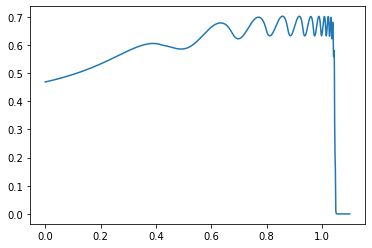

In [6]:
maxmonitorratio=[]

auxtime=[]
    
subdir = dir+"/monitorratio.txt"

grid=[] 
print(subdir)
## reading 2D data
t=0

with open(subdir) as f:
    for line in f:
        
        index = line.find("Time")

        if index==1:
            t=t+1
            
            auxtime.append(float(line[index+7:len(line)-1]))
            
            auxgrid=[]
            auxdata=[]


        else:

            a=line.split()
            if a!=[]:
                
                auxgrid.append(float(a[0]))
                auxdata.append(float(a[1]))

            elif a==[]:


                    
                if t==1:
                    grid.append(auxgrid)
                L=len(auxgrid)

                maxmonitorratio.append(np.max(auxdata))
                    
#count=len(datatime[2])+1
#count

len(maxmonitorratio)

plt.plot(auxtime,maxmonitorratio)

####

In [7]:
maxmonitorratio[0]

0.46896109511

# Styling plots

In [5]:
plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize':18,
    'xtick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.labelsize': 'large',
    'ytick.color': 'black'})

# Convert central time to Bondi time

In [6]:
#trapezoidal rule
def trap_integrator(func,f0,x):
    integration=[f0]
    for i in range(0,len(x)-1):
        dx=x[i+1]-x[i]
    
        integral=dx/2*(func(x[i+1])+func(x[i]))
        
        integration.append(integration[i]+integral)
    return integration

#convert central time to bondi time
"""def converttobondi(time, beta_scri):

    spl = UnivariateSpline(time, np.multiply(np.exp(np.multiply(beta_scri,-2)),time), s=0)

    return trap_integrator(spl,0,time)

bonditime=converttobondi(time,beta_scri)"""
def converttobondi(time, beta_scri):

    spl = UnivariateSpline(time, np.exp(np.multiply(beta_scri,2)), s=0)

    return trap_integrator(spl,0,time)

bonditime=converttobondi(time,beta_scri)

NameError: name 'time' is not defined

In [ ]:
y=converttobondi(time,beta_scri)


dy=[]
edoisbeta=[]
for i in range(0, len(y)-1):
    dd=(y[i+1]-y[i])/(time[i+1]-time[i])
    dy.append(dd)
    edoisbeta.append(np.exp(2*beta_scri[i]))
    
plt.plot(dy,time[0:len(dy)])
plt.plot(edoisbeta,time[0:len(dy)])
#dy/dtime==e2beta

#print(dy)
#print(edoisbeta)

# Chi at origin

In [ ]:
plt.plot(time, derderxi_ori)

Finding zero crossings

In [ ]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(time, derderxi_ori, s=0)

roots=spl.roots()
print("Number of zero crossing is ",len(roots))
#print(roots[k:(k+3)+1])


"""for kkkk in range(0,len(roots)-4):
    tau_star=(roots[0+kkkk]*roots[3+kkkk]-roots[1+kkkk]*roots[2+kkkk])/(roots[0+kkkk]-roots[1+kkkk]-roots[2+kkkk]+roots[3+k])

    print("Delta is ", 2*math.log((tau_star-roots[kkkk])/(tau_star-roots[kkkk+1])), " for k =", kkkk)"""

k=3

tau_star=(roots[0+k]*roots[3+k]-roots[1+k]*roots[2+k])/(roots[0+k]-roots[1+k]-roots[2+k]+roots[3+k])
print("\nTau star is ", tau_star)
print("Tau* is u* in my report")

Delta=2*math.log((tau_star-roots[k])/(tau_star-roots[k+1]))
print("\nDelta is ", Delta)

Using multiple crossings

In [13]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(time, derderxi_ori, s=0)

roots=spl.roots()
print("Number of zero crossing is ",len(roots))
#print(roots[k:(k+3)+1])


"""for kkkk in range(0,len(roots)-4):
    tau_star=(roots[0+kkkk]*roots[3+kkkk]-roots[1+kkkk]*roots[2+kkkk])/(roots[0+kkkk]-roots[1+kkkk]-roots[2+kkkk]+roots[3+k])

    print("Delta is ", 2*math.log((tau_star-roots[kkkk])/(tau_star-roots[kkkk+1])), " for k =", kkkk)"""


kk=range(0,4)

final_Delta=[]
final_tau_star=[]
for k in kk:
    tau_star=(roots[0+k]*roots[3+k]-roots[1+k]*roots[2+k])/(roots[0+k]-roots[1+k]-roots[2+k]+roots[3+k])
    #print("\nTau star is ", tau_star)
    #print("Tau* is u* in my report")

    Delta=2*math.log((tau_star-roots[k])/(tau_star-roots[k+1]))
    #print("\nDelta is ", Delta)
    
    if abs(Delta-0.73)<0.01:
        print("\nDelta is ", Delta)
        final_Delta.append(Delta)
        final_tau_star.append(tau_star)
        
avg=np.average(final_Delta)
tau=np.average(final_tau_star)


print("average is ", avg, " std dev is ",max(final_Delta, key=lambda x: abs(x - avg))-avg)
print("average is ", tau, " std dev is ",max(final_tau_star, key=lambda x: abs(x - tau))-tau)

Number of zero crossing is  14

Delta is  0.7386032796992257
average is  0.7386032796992257  std dev is  0.0
average is  1.0534945575061658  std dev is  0.0


In [14]:
tau_star=tau
Delta=avg

In [15]:
#adapt_time = [-math.log(abs((tau_star-x))) for x in time[0:len(time)-1]]#0:len(time)-step:step]] #ignoring last timestep, where log(0)

adapt_time=[]

for x in time:
    if x<=tau_star:
        adapt_time.append(-math.log(abs((tau_star-x))))

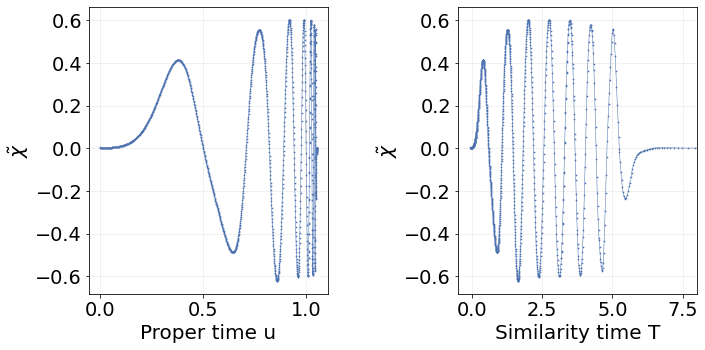

In [16]:
chitilde=[]
i=0
for tt in adapt_time:
    
    aux=np.exp(-tt)*1/2*derderxi_ori[i] #chi tilde = e^-T chi = e^-T (1/2 xi,rr)
    chitilde.append(aux)
    i=i+1

with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))


    ax1.plot(time[0:len(chitilde)],chitilde,linewidth=0.5)
    ax1.scatter(time[0:len(chitilde)],chitilde,s=0.5)
    ax1.set_xlabel("Proper time u",fontsize=20)
    ax1.set_ylabel(r"$\tilde{\chi}$",fontsize=20)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    #ax1.set_xlim([1,1.1])
    
    ax2.plot(adapt_time,chitilde,linewidth=0.5)
    ax2.scatter(adapt_time,chitilde,s=0.5)
    ax2.set_xlabel("Similarity time T",fontsize=20)
    ax2.set_ylabel(r"$\tilde{\chi}$",fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    fig.tight_layout(pad=3.0)
    ax2.set_xlim([-0.5, 8])
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

In [17]:
len(grid[0])

5999

Compactness

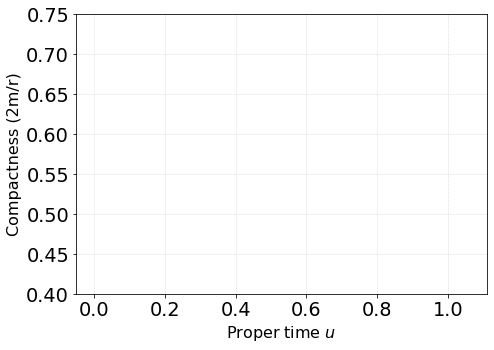

In [110]:
with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16


    plt.plot(auxtime,maxmonitorratio,linewidth=0.7)
    plt.scatter(auxtime,maxmonitorratio,s=0.2,alpha=0.8)
    #plt.plot(converttobondi(time,beta_scri),maxmonitorratio,linewidth=0.5)
    #plt.scatter(converttobondi(time,beta_scri),maxmonitorratio,s=0.2,alpha=0.8)
    
    plt.xlim(-0.05, 1.11)
    plt.ylim(0.4, 0.75)
    plt.xlabel("Proper time $u$")#$\u03C4$")
    plt.ylabel("Compactness (2m/r)")#$\u03C4$")
    plt.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    
    plt.tight_layout(pad=3.0)
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

News function

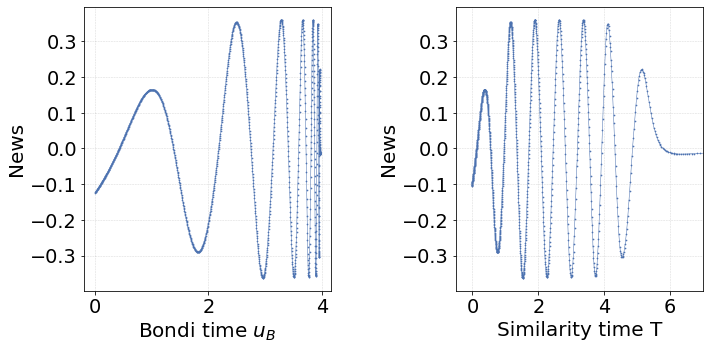

In [25]:
news=[]
for i in range(0, len(xi_scri)-1):
    
    #these look flat
    new=np.sqrt(2)*np.exp(2*beta_scri[i])*(xi_scri[i+1]-xi_scri[i])/(bonditime[i+1]-bonditime[i])#*
    new=np.sqrt(2)*(xi_scri[i+1]-xi_scri[i])/(time[i+1]-time[i])#*
    
    
    #new=np.sqrt(1/(-4*math.pi) *np.exp(-2*beta_scri[i])*(m_scri[i+1]-m_scri[i])/(time[i+1]-time[i]))#*
    news.append(new)
    
with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'

    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))


    ax1.plot(bonditime[0:len(adapt_time)],news[0:len(adapt_time)],linewidth=0.5)
    ax1.scatter(bonditime[0:len(adapt_time)],news[0:len(adapt_time)],s=0.5)
    ax1.set_xlabel("Bondi time $u_B$",fontsize=20)
    ax1.set_ylabel("News",fontsize=20)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    ax1.set_yticks([-0.3,-0.2,-0.1,0,0.1,0.2, 0.3])
    
    ax2.plot(adapt_time[20:len(adapt_time)],news[20:len(adapt_time)],linewidth=0.5)
    ax2.scatter(adapt_time[20:len(adapt_time)],news[20:len(adapt_time)],s=0.5)
    ax2.set_xlabel("Similarity time T",fontsize=20)
    ax2.set_ylabel("News",fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    ax2.set_yticks([-0.3,-0.2,-0.1,0,0.1,0.2, 0.3])
    fig.tight_layout(pad=3.0)
    ax2.set_xlim([-0.5,7])
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

m at scri+

/tmp/ipykernel_11224/2306096497.py:39: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim([0.0001,0.0000])


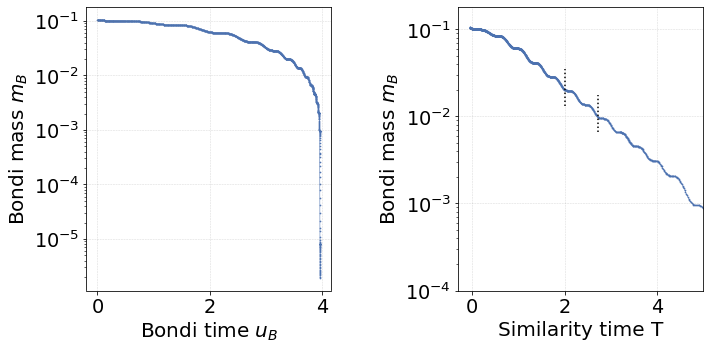

In [37]:
mplt=[]

i=0
for tt in adapt_time:
    
    aux=m_scri[i]#np.exp(-tt)*1/2*m_scri[i]
    mplt.append(aux)
    i=i+1
    
with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    
    # time
    #ax1.scatter(bonditime[0:len(mplt)],mplt[0:len(mplt)],s=0.5)
    #ax1.plot(bonditime[0:len(mplt)],mplt[0:len(mplt)],linewidth=0.5)
    ax1.scatter(bonditime[0:len(mplt)],mplt,s=0.5)
    ax1.plot(bonditime[0:len(mplt)],mplt,linewidth=0.5)
    ax1.set_ylabel("Bondi mass $m_B$", fontsize=20)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    #ax1.set_xlim([3.85,4])
    
    ax1.set_yscale('log')
    #ax1.set_xlabel("$\u03C4$")#T
    ax1.set_xlabel("Bondi time $u_B$", fontsize=20)#$\u03C4$")
    
    # adapt time
    
    #ax2.plot(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),linewidth=0.5)
    #ax2.scatter(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),s=0.5)
    ax2.plot(adapt_time,np.array(mplt),linewidth=0.5)
    ax2.scatter(adapt_time,np.array(mplt),s=0.5)
    ax2.set_yscale('log')
    ax2.set_xlim([-0.3,5])
    ax2.set_ylim([0.0001,0.0000])
    ax2.set_ylabel("Bondi mass $m_B$", fontsize=20)
    ax2.set_xlabel("Similarity time T", fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    ax2.axvline(2,0.65,0.78,color='k',linestyle='dotted')
    ax2.axvline(2.73,0.56,0.69,color='k', linestyle='dotted')

    fig.tight_layout(pad=3.0)
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

numerical vs analytical mass loss

In [112]:
#chi,u
deruxi = []

for i in range(0, len(xi_scri)-1):
    aux=(xi_scri[i+1]-xi_scri[i])/(time[i+1]-time[i])##eq.59 from my report ref eq:news
    deruxi.append(aux)

#theoretical mass loss

massloss=[]

for i in range(0, len(xi_scri)-1):
    aux=-8*math.exp(-4*beta_scri[i])*math.pi*deruxi[i]**2#this is m,ub, so its eq:masslossanalyticalym but translated to bondi
    #-8*math.exp(-2*beta_scri[i])*math.pi*deruxi[i]**2
    massloss.append(aux)



In [113]:
#experimental mass loss
masslossexp=[]
for i in range(0, len(m_scri)-1):
    aux=(m_scri[i+1]-m_scri[i])/(bonditime[i+1]-bonditime[i])##eq.59 from my report ref eq:news
    masslossexp.append(aux)

In [114]:
colors= plt.rcParams['axes.prop_cycle'].by_key()['color']                       
print('\n'.join(color for color in colors))                                      
#E24A33

#1f77b4
#ff7f0e
#2ca02c
#d62728
#9467bd
#8c564b
#e377c2
#7f7f7f
#bcbd22
#17becf


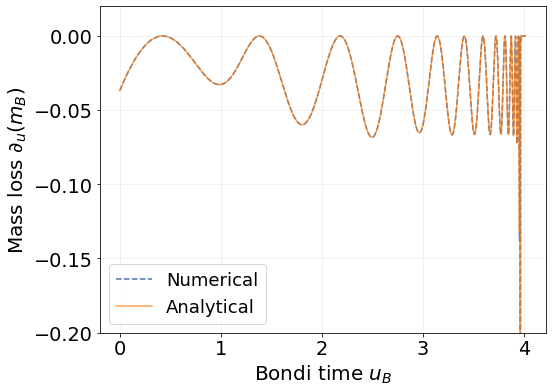

In [134]:

with plt.style.context('seaborn-v0_8-deep'):
    
    
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16


    
    plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],masslossexp,label='Numerical',linewidth=1.5,linestyle="dashed")
    plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],massloss,label='Analytical',linewidth=1.5,alpha=0.7,color='#ff7f0e')
    
    #plt.xlim(-0.01, 0.165)
    plt.xlabel("Bondi time $u_B$", fontsize=20)#$\u03C4$")
    plt.ylabel("Mass loss $\partial_u(m_B)$", fontsize=20)#$\u03C4$")
    plt.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    plt.ylim([-0.2,0.02])
    
    plt.legend(fontsize=18);

    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

    plt.show()
#plt.xlim([0,3])

Redshift factor

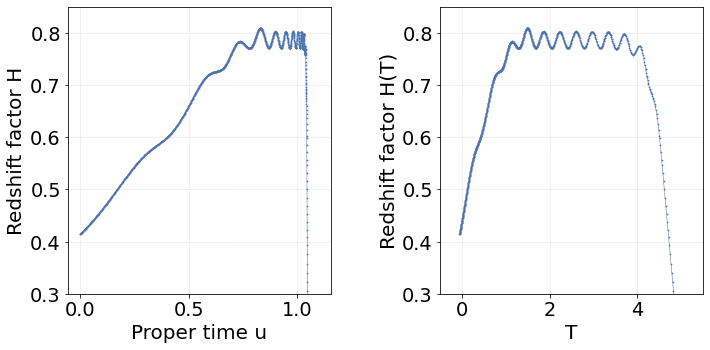

In [61]:
redshift=[]
for i in range(0, len(beta_scri)):
    #redshift.append(math.exp(2*beta[i][len(beta[0])-4])-1)
    #redshift.append(math.exp(2*beta_scri[i])-1)
    redshift.append(beta_scri[i])
    
with plt.style.context('seaborn-v0_8-deep'):
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    ax1.plot(time,redshift,linewidth=0.5)
    ax1.scatter(time,redshift,s=0.5)
    ax1.set_xlabel("Proper time u",fontsize=20)#"$\u03C4$")
    ax1.set_ylabel("Redshift factor H",fontsize=20)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    ax1.set_ylim([0.3,0.85])
    
    ax2.plot(adapt_time[0:len(adapt_time)],redshift[0:len(adapt_time)],linewidth=0.5)
    ax2.scatter(adapt_time[0:len(adapt_time)],redshift[0:len(adapt_time)],s=0.5)
    ax2.set_xlim([-0.5,5.5])
    ax2.set_ylim([0.3,0.85])
    ax2.set_xlabel("T",fontsize=20)
    ax2.set_ylabel("Redshift factor H(T)",fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    fig.tight_layout(pad=3.0)
    
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [90]:
ax2.plot(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),linewidth=0.5)
    ax2.scatter(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),s=0.5)
    ax2.set_yscale('log')
    #ax2.set_xlim([0,2])
    #ax2.set_ylim([0.01,0])
    ax2.set_ylabel("Bondi mass $m_B$", fontsize=20)
    ax2.set_xlabel("Similarity time T", fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)

    fig.tight_layout(pad=3.0)

IndentationError: unexpected indent (124731751.py, line 2)

Bondi mass at scri+

In [ ]:
mplt=[]
for i in range(0, len(derpsi)):
    mplt.append(m[i][len(m[0])-4]) #saving derpsi at the origin for each timestep

with plt.style.context('seaborn-v0_8-deep'):
    
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))
    
    
    
    
    # time
    ax1.scatter(time,mplt,s=0.5)
    ax1.plot(time,mplt,linewidth=0.5)
    ax1.set_ylabel("Bondi mass")
    #ax1.set_xlim([.8,1.04])
    #ax1.set_ylim([-0.001,0.002])
    ax1.set_yscale('log')
    ax1.set_xlabel("$\u03C4$")#T
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    # adapt time
    
    ax2.plot(adapt_time,np.array(mplt[0:len(adapt_time)]),linewidth=0.5)
    ax2.set_yscale('log')
    #ax2.set_xlim([2.55,2.6])
    #ax2.set_ylim([-0.001,0.001])
    ax2.set_ylabel("Bondi mass")
    ax2.set_xlabel("T")
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    plt.show()

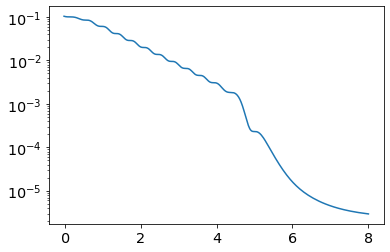

In [91]:
plt.plot(adapt_time[10:len(adapt_time)-3],np.array(mplt[10:len(adapt_time)-3]))
plt.yscale('log')

# Mass Scaling

In [7]:
from scipy.optimize import curve_fit
import matplotlib.ticker as mticker

In [8]:
dir = "/home/rita13santos/Desktop/6jun"#1
dir = "/home/rita13santos/Desktop/now"
dir = "/home/rita13santos/Desktop"
dir = "/home/rita13santos/Desktop/analyze"#1

In [9]:
masses=[]
amplitudes=[]




#subdir = dir+"/parameters2.csv"
subdir = dir+"/parameters7.csv"


    
import csv

with open(subdir) as f:
    i=0
    
    reader = csv.DictReader(f)
    
    for row in reader:
        
        print("A* ", row['Column2'], "mass ", row['Column8'])
        amplitudes.append(float(row['Column2']))
        masses.append(float(row['Column8']))


A*  0.08858270084023113 mass  0.0
A*  0.08858270084023113 mass  0.0019089668375575947
A*  0.0885448838519006 mass  0.0017250605709732262
A*  0.08848253417884624 mass  0.0014734404034390835
A*  0.08843752713495136 mass  0.0013227436711869178
A*  0.08837973694666033 mass  0.001158479063726927
A*  0.08830553287605948 mass  0.00098505829715855
A*  0.0882102529633863 mass  0.0009643762966570011
A*  0.08808791113381416 mass  0.0009556735795688817


supercritical

In [10]:
amplitudes

[0.08858270084023113,
 0.08858270084023113,
 0.0885448838519006,
 0.08848253417884624,
 0.08843752713495136,
 0.08837973694666033,
 0.08830553287605948,
 0.0882102529633863,
 0.08808791113381416]

In [11]:

Astar=0.0886409955039620
"""
filtered_amplitudes, filtered_masses = zip(*[(a, m) for a, m in zip(amplitudes, masses) if -20.5 <= math.log(-(a-Astar)) <= -4.5])

print(list(filtered_amplitudes))  # Filtered x values
print(list(filtered_masses))  # Corresponding filtered y values""";

subcritical

In [12]:
amplitudes=[0.08864099549007405,
 0.08864099548106465,
 0.08864099546621065,
 0.08864099544172055,
 0.0886409954013432,
 0.08864099533477221,
 0.08864099522501519,
 0.08864099504405645,
 0.08864099474570596,
 0.08864099425380913]+[0.08864099344280837,
 0.08864099210569418,
 0.08864098990116556,
 0.08864098626651233,
 0.08864098027398225,
 0.08864097039397044,
 0.08864095410458481,
 0.08864092724792823,
 0.08864088296878728,
 0.08864080996482573]+[0.0886406896016415,0.08864049115629943,0.0886401639752429,
0.08863962454487562,
0.08863873517455502,
0.08863726885078992,
0.08863485129160867,
0.08863086541036337,
0.08862429380317176,
0.08861345905461225,
0.0885955955741995,
0.0885661436740743,
0.08851758569987532]+[0.08864099549314605,
 0.08864099548612953,
 0.08864099547456122,
 0.08864099545548831,
 0.0886409954240424,
 0.08864099537219686,
 0.08864099528671801,
 0.0886409951457872,
 0.0886409949134316,
 0.08864099453034197,
 0.08864099389873394]+[0.08864099389873394,
 0.08864099285738836,
 0.08864099114049974,
 0.08864098830982897,
 0.08864098364284184,
 0.08864097594828091,
 0.08864096326209463,
 0.08864094234610945,
 0.08864090786147981,
 0.08864085100593738,
 0.08864075726699525,
 0.08864060271760744,
 0.08864034790874441,
 0.08863992779995196,
 0.08863923515764983,
 0.08863809318355334,
 0.08863621038656987,
 0.0886331061791348,
 0.08862798820630793,
 0.08861955009564541,
 0.08860563800311158]+[0.08858270084023113,
 0.0885448838519006,
 0.08848253417884624,
 0.08843752713495136,
 0.08837973694666033,
 0.08830553287605948,
 0.0882102529633863,
 0.08808791113381416]

masses=[0.024697886075575565,
 0.023115060279442677,
 0.02077954881230433,
 0.02015024734279531,
 0.019974417805825415,
 0.019689925953953195,
 0.019233164310640705,
 0.01851099709824941,
 0.017393576639260958,
 0.01573602421756846]+[0.013432769995769554,
 0.010523221060253971,
 0.009596836439882819,
 0.009411573501558575,
 0.009117916086624068,
 0.00866304719713415,
 0.007983729996352329,
 0.007022274241213345,
 0.005761399032837494,
 0.00461711520476861]+[0.0045475916568842615,0.0044364420554456096,0.00426205018696188,0.003996279890467208,
        0.003608736760631016,0.003078683042227779,0.0024155819548563337,0.0021889567407866756,0.0021471845836153213,
        0.002080948280788837,0.0019783559767499732,0.0018250630998536777,0.0016079086624374516]+[0.02527013993961501,
 0.023987987789309682,
 0.02205033207697675,
 0.020211115630313442,
 0.020073183282147987,
 0.019849113786762625,
 0.019487986127191784,
 0.018912379071477546,
 0.01801096684151779,
 0.01664116215483618,
 0.014666472293844914]+[0.014666472293844914,
 0.01204231969392436,
 0.009661276052166655,
 0.00951505247685704,
 0.009281261737417636,
 0.00891442584113704,
 0.008355591749335808,
 0.007540848614885311,
 0.006427458783177841,
 0.005036252910212809,
 0.004586474079831943,
 0.004498409806750908,
 0.004358777048965328,
 0.004142518385285973,
 0.003819444276213717,
 0.0033619200433335486,
 0.002761352188402339,
 0.0022034894071399623,
 0.0021705149257310805,
 0.002117792801834351,
 0.0020350595121728862]+[0.0019089668375575947,
 0.0017250605709732262,
 0.0014734404034390835,
 0.0013227436711869178,
 0.001158479063726927,
 0.00098505829715855,
 0.0009643762966570011,
 0.0009556735795688817]

In [13]:
Astar=0.0886409955039620

filtered_amplitudes, filtered_masses = zip(*[(a, m) for a, m in zip(amplitudes, masses) if m>0])

In [14]:
#amplitudes=amplitudes[1:len(amplitudes)]
#masses=masses[1:len(masses)]

/tmp/ipykernel_5657/3301796195.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(xx, fit_eval, 'r-',linewidth=1.5,color='#1f77b4',alpha=0.5)


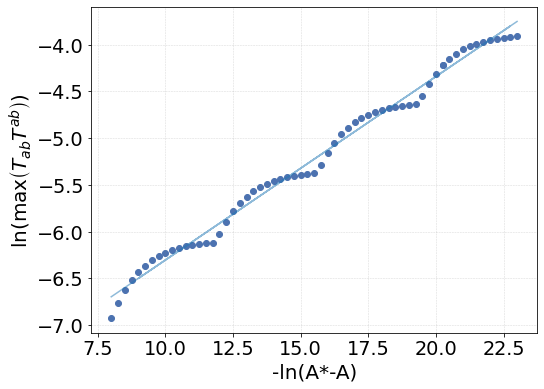

[ 0.19619725 -8.26570298]


0.19619724640900638

In [15]:

xx=[]
yy=[]

i=0
for x in filtered_amplitudes:
    
    #if -math.log(-(x-Astar))<22.75 and -math.log(-(x-Astar))>8:
    if -math.log(-(x-Astar))<23.1 and -math.log(-(x-Astar))>7.8:
        xx.append(-math.log(-(x-Astar)))
        yy.append(math.log(filtered_masses[i]))
    
    i=i+1
        
#xx=xx[2:len(xx)-11]
#yy=yy[2:len(yy)-11]




def func(x, a, b):

    return a * x + b


popt, pcov = curve_fit(func, xx, yy, p0=[0.1977, 0.0009])#,bounds=([0.197, -np.inf], [0.198, np.inf]))

fit_eval=[]
for x in xx:
    fit_eval.append(func(x, popt[0], popt[1]))

    

with plt.style.context('seaborn-v0_8-deep'):
    plt.figure(figsize=(8,6))
    plt.rcParams["figure.figsize"] = (8,6)
    #plt.rcParams["font.size"]= 20
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16

    #plt.rcParams["legend.fontsize"]= 18
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"

    plt.scatter(xx,yy)
    
    plt.plot(xx, fit_eval, 'r-',linewidth=1.5,color='#1f77b4',alpha=0.5)
    
    plt.xlabel("-ln(A*-A)", fontsize=20)#$\u03C4$")
    #plt.ylabel(r"ln(m$_{BH}$)", fontsize=20)#$\u03C4$")
    plt.ylabel(r"ln(max$\left(T_{ab}T^{ab}\right)$)", fontsize=20)#$\u03C4$")
    plt.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))

    #plt.legend(fontsize=18);

    plt.savefig("subcriticalscaling.pdf", format="pdf", bbox_inches="tight")
    #plt.xlim(-19,-26)
    #plt.ylim(-0.354,-0.3530)


    
    #plt.plot(xx,np.subtract(np.multiply(xx,0.1977),8.2))
    plt.show()
    
    
print(popt)
popt[0]

In [16]:
np.sort(xx)

array([ 8.        ,  8.25      ,  8.5       ,  8.75      ,  9.        ,
        9.25      ,  9.5       ,  9.75      , 10.        , 10.25      ,
       10.5       , 10.75      , 11.        , 11.25      , 11.5       ,
       11.75      , 12.        , 12.25      , 12.5       , 12.75      ,
       13.        , 13.25      , 13.5       , 13.75      , 14.        ,
       14.25      , 14.5       , 14.75      , 15.        , 15.25      ,
       15.5       , 15.75      , 16.        , 16.25      , 16.5       ,
       16.75      , 17.        , 17.25      , 17.5       , 17.75      ,
       18.        , 18.25      , 18.5       , 18.75      , 19.        ,
       19.25      , 19.5       , 19.75      , 20.        , 20.25      ,
       20.25      , 20.5       , 20.75      , 21.        , 21.25      ,
       21.49999999, 21.74999999, 22.        , 22.25000003, 22.50000003,
       22.75000002, 22.99999994])

In [148]:
residuals = np.array(yy) - np.array(fit_eval)
SSR = np.sum(residuals**2)
print("Sum of squared residuals:", SSR)
MSE = np.mean(residuals**2)
print("Mean squared error:", MSE)
RMSE = np.sqrt(MSE)
print("Root mean squared error:", RMSE)

Sum of squared residuals: 0.46017138304417815
Mean squared error: 0.007422119081357712
Root mean squared error: 0.08615172129074214


In [149]:
perr=np.sqrt(np.diag(pcov))

In [150]:
print("We obtain a gamma value of ",popt[0]," +/ ",perr[0])#<5.5

We obtain a gamma value of  0.19619724640900638  +/  0.002523815858907385


In [17]:
popt
pcov

np.sqrt(np.diag(pcov))

array([0.00252382, 0.04085554])

/tmp/ipykernel_9303/3848727026.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_sorted, y_sorted, 'r-',label=r'fit: $\gamma$=%5.4f, c=%5.4f' % tuple(popt),linewidth=1.5,alpha=0.7,color='#1f77b4')


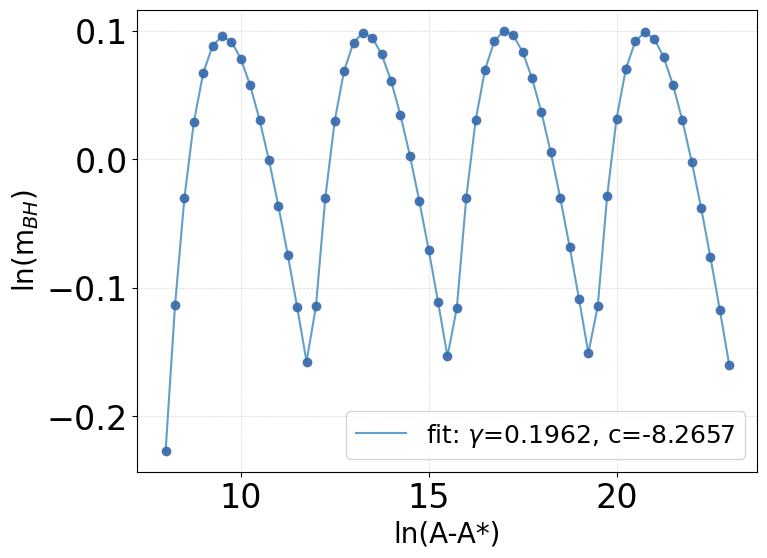

[ 0.19619725 -8.26570298]


0.19619724655835147

In [152]:

Astar=0.0886409955039620

"""

xx=[]
yy=[]

i=0
for x in amplitudes:

    xx.append(math.log(-(x-Astar)))
    yy.append(math.log(masses[i]))
    i=i+1"""
        

def func(x, a, b):

    return a * x + b


popt, pcov = curve_fit(func, xx, yy)

fit_eval=[]
yy_new=[]
i=0
for x in xx:
    fit_eval.append(func(x, popt[0], popt[1]))
    #print(yy[i]-func(x, popt[0], popt[1]))
    yy_new.append(yy[i]-func(x, popt[0], popt[1]))
    i=i+1
   
    
with plt.style.context('seaborn-v0_8-deep'):
    #plt.figure(figsize=(8,6))
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"]= 20
    plt.rcParams["legend.fontsize"]= 18
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"

    plt.scatter(xx,yy_new)
    
    sorted_indices = np.argsort(xx)
    x_sorted = np.array(xx)[sorted_indices]
    y_sorted = np.array(yy_new)[sorted_indices]
    plt.plot(x_sorted, y_sorted, 'r-',label=r'fit: $\gamma$=%5.4f, c=%5.4f' % tuple(popt),linewidth=1.5,alpha=0.7,color='#1f77b4')
    
    plt.xlabel("ln(A-A*)", fontsize=20)#$\u03C4$")
    plt.ylabel(r"ln(m$_{BH}$)", fontsize=20)#$\u03C4$")
    plt.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    
    """plt.axvline(x=-21)
    plt.axvline(x=-17)
    plt.axvline(x=-13.5)"""
    
    
    plt.legend(fontsize=18);

    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()



print(popt)
popt[0]

In [97]:
((21-17)+(17-13.5))/2

array([56, 55, 54, 26, 53, 25, 52, 24, 51, 23, 50, 22, 49, 21, 48, 20, 47,
       19, 46, 18, 45, 17, 44, 16, 43, 15, 42, 14, 41, 13, 40, 12, 39, 11,
       38, 10, 37,  9, 36,  8, 35,  7, 34,  6, 33,  5, 32,  4, 30, 31,  3,
       29,  2, 28,  1, 27,  0])

(-8.6, -8.1)

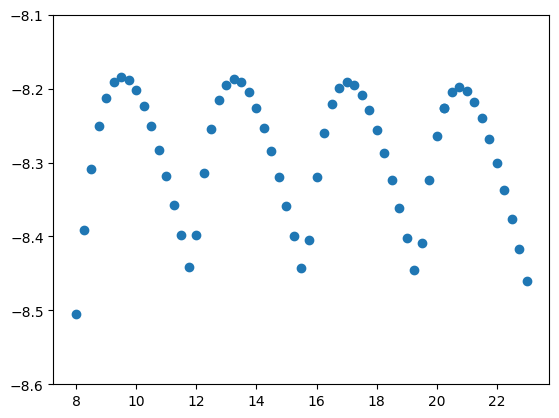

In [42]:
yyy=np.subtract(yy,np.multiply(0.1977,xx))

plt.scatter(xx,yyy)
#plt.plot(xx,yyy)
plt.ylim(-8.6,-8.1)